# Channel Insights

Visualize what channels are bringing in:
    
    - the most selling sellers
    - top sellers
        - lead type: online  big

In [1]:
#Importing Libraries & set up
import byMontse as byM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
from datetime import datetime,date,timedelta 
import datetime as dt
import calendar


from IPython.display import Image
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 2)

# Configure visualizations
%matplotlib inline
custom_params = {"axes.spines.right": False, "axes.spines.top": False, 'grid.linestyle': '--','figure.figsize': [8,6], 'font.size': 16}
sns.set_theme(style='ticks', rc=custom_params)
base_color=sns.color_palette()[0]

#Warnings managemnet
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
seller=pd.read_csv('Olist_saved/seller_df.csv')
byM.datasummary(seller).fillna('').replace(0,'')

Dataset Shape: (765, 32)


,dtypes,count,unique,missing,top,freq,mean,std,min,25%,50%,75%,max,First Value
seller_id,object,765.0,765,,f66425655311542de5db64f27d0d5651,1,,,,,,,,2c43fb513632d29b3b58df74816f1b06
sdr_id,object,765.0,22,,4b339f9567d060bcea4f5136b9f5949e,137,,,,,,,,a8387c01a09e99ce014107505b92388c
sr_id,object,765.0,18,,4ef15afb4b2723d8f3d81e51ec7afefe,130,,,,,,,,4ef15afb4b2723d8f3d81e51ec7afefe
won_date,object,765.0,146,,2018-04-30,22,,,,,,,,2018-02-26
business_segment,object,765.0,32,,home_decor,96,,,,,,,,pet
lead_type,object,765.0,8,,online_medium,303,,,,,,,,online_medium
lead_behaviour_profile,object,765.0,8,,cat,373,,,,,,,,cat
business_type,object,765.0,3,,reseller,529,,,,,,,,reseller
first_contact_date,object,765.0,180,,2018-02-06,13,,,,,,,,2018-02-21
landing_page_id,object,765.0,122,,b76ef37428e6799c421989521c0e5077,163,,,,,,,,b48ec5f3b04e9068441002a19df93c6c


In [3]:
# variables gathered
df=seller[['seller_id','won_month','business_segment','lead_type','lead_behaviour_profile','business_type','contact_month','seller_days_withOlist','origin','seller_acquisition_days','total_sold']]
df['target']=pd.Series(df['total_sold']/df['seller_days_withOlist']*30) # avg LTV (1-month)

<ipython-input-3-bdde019f82e8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target']=pd.Series(df['total_sold']/df['seller_days_withOlist']*30) # avg LTV (1-month)


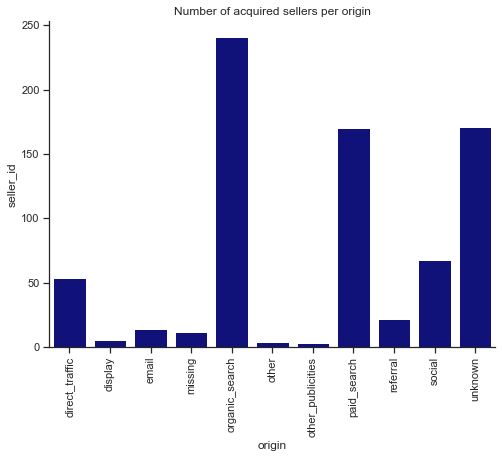

In [4]:
total = df.groupby('origin')['seller_id'].count().reset_index()
bar1 = sns.barplot(x="origin",  y="seller_id", data=total, color='darkblue')

plt.title('Number of acquired sellers per origin')
plt.xticks(rotation=90)
plt.show()

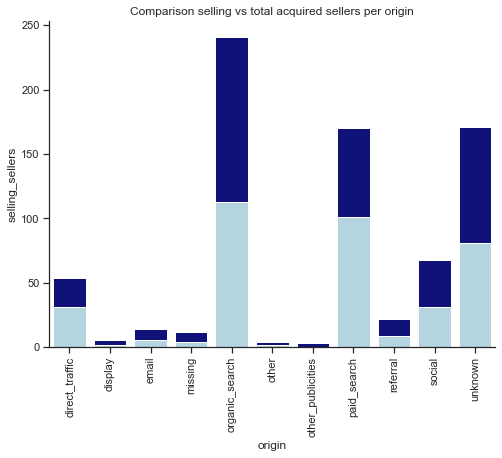

In [5]:
# Comparison selling vs total acquired sellers per origin
sellingsellers=df.loc[df.target>0]
sellingorigin=sellingsellers.groupby('origin')['seller_id'].count().reset_index()
sellerchannel=pd.DataFrame(total.merge(sellingorigin, on='origin', how='left'))
sellerchannel.rename(columns={'seller_id_x':'total_acquired_sellers', 'seller_id_y':'selling_sellers'}, inplace=True)
sellerchannel=sellerchannel.fillna(0)

bar1 = sns.barplot(x="origin",  y="total_acquired_sellers", data=sellerchannel, color='darkblue')
bar2 = sns.barplot(x="origin", y="selling_sellers", data=sellerchannel, ci=None,  color='lightblue')

plt.title('Comparison selling vs total acquired sellers per origin')
plt.xticks(rotation=90)
plt.savefig('Olist_saved/sellingvstotal_origin.png')
plt.show()

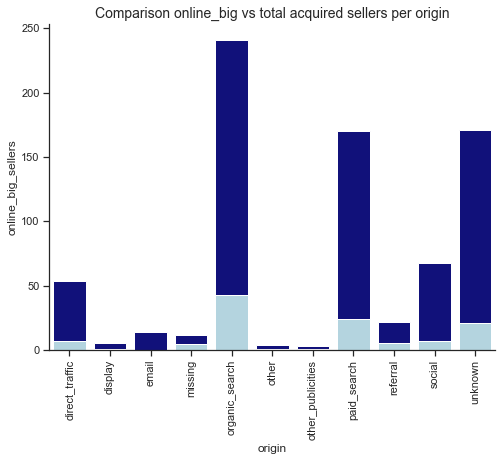

In [6]:
# Comparison online big (best segment) vs total acquired sellers per origin
online_big=df.loc[df.lead_type=='online_big']
bigorigin=online_big.groupby('origin')['seller_id'].count().reset_index()
bigchannel=pd.DataFrame(total.merge(bigorigin, on='origin', how='left'))
bigchannel.rename(columns={'seller_id_x':'total_acquired_sellers', 'seller_id_y':'online_big_sellers'}, inplace=True)
bigchannel=bigchannel.fillna(0)
bigchannel
bar3 = sns.barplot(x="origin",  y="total_acquired_sellers", data=bigchannel, color='darkblue')
bar4 = sns.barplot(x="origin", y="online_big_sellers", data=bigchannel, ci=None,  color='lightblue')

plt.title('Comparison online_big vs total acquired sellers per origin', fontsize=14)
plt.xticks(rotation=90)
plt.savefig('Olist_saved/bigonlinevstotal_origin.png')
plt.show()

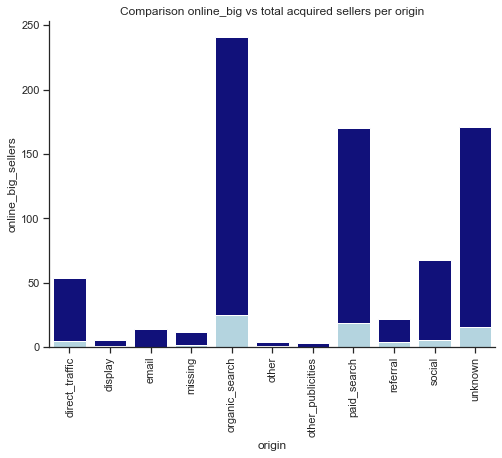

In [7]:
# Comparison online big (best segment) vs total acquired sellers per origin
online_big=df.loc[(df.lead_type=='online_big')& (df.target>0)]
bigorigin=online_big.groupby('origin')['seller_id'].count().reset_index()
bigchannel=pd.DataFrame(total.merge(bigorigin, on='origin', how='left'))
bigchannel.rename(columns={'seller_id_x':'total_acquired_sellers', 'seller_id_y':'online_big_sellers'}, inplace=True)
bigchannel=bigchannel.fillna(0)
bigchannel
bar3 = sns.barplot(x="origin",  y="total_acquired_sellers", data=bigchannel, color='darkblue')
bar4 = sns.barplot(x="origin", y="online_big_sellers", data=bigchannel, ci=None,  color='lightblue')

plt.title('Comparison online_big vs total acquired sellers per origin', fontsize=12)
plt.xticks(rotation=90)
plt.savefig('Olist_saved/bigonlinevstotal_origin.png')
plt.show()